In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#   step1  检测步数

w=15        #定义滑动窗口
Data_A=pd.read_csv('Accelerometer.csv')
A=np.array(Data_A.iloc[:,1:])
A_p=np.sqrt(A[:,0]**2+A[:,1]**2+A[:,2]**2)
Time=np.array(Data_A.iloc[:,0])
A_mean=np.zeros_like(A_p)
A_sigma=np.zeros_like(A_p)

#   计算平均值 
for k in range(len(A_mean)):
    if k>=w:
        A_mean[k]=np.sum(A_p[k-w:k+w+1])/(w*2+1)
    else:
        A_mean[k]=np.sum(A_p[k:k+w+1])/(w+1)

temp=(A_p-A_mean)**2
#   计算方差
for k in range(len(A_mean)):
    if k>=w:
        A_sigma[k]=np.sum(temp[k-w:k+w+1])/(w*2+1)
    else:
        A_sigma[k]=np.sum(temp[k:k+w+1])/(w+1)

del(temp)

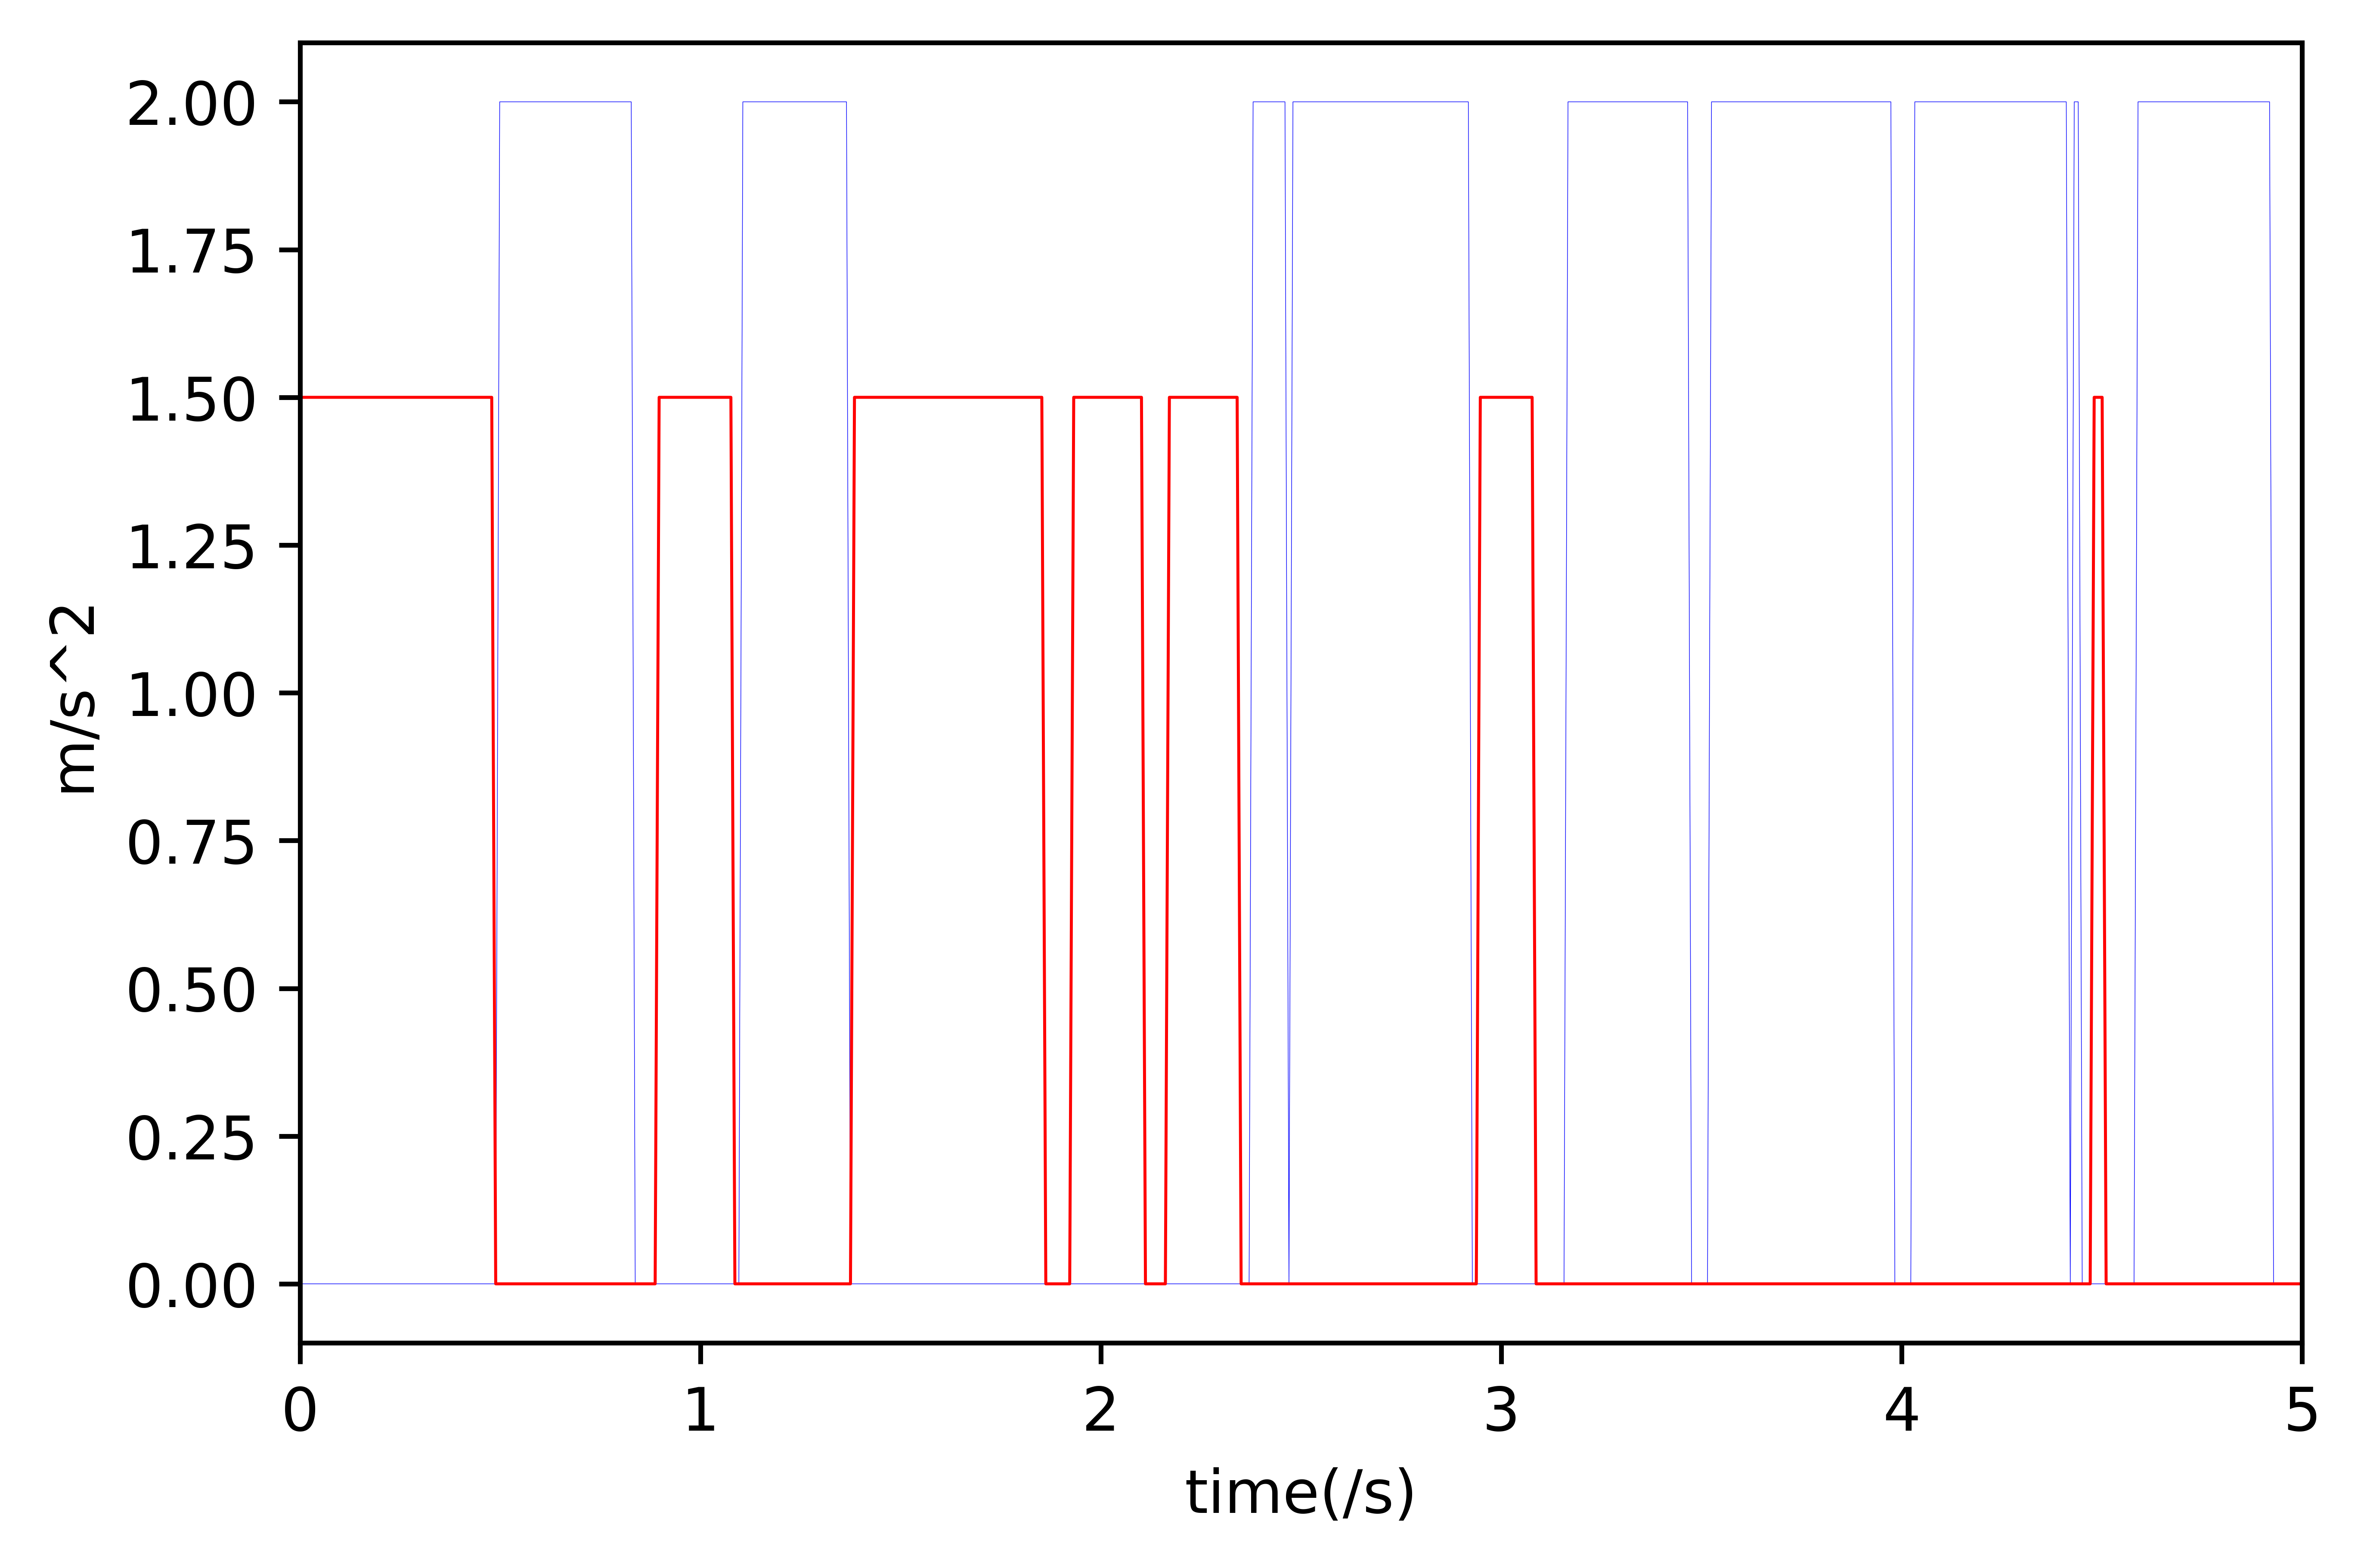

In [46]:
B1=np.zeros_like(A_p)
B2=np.zeros_like(A_p)
T1=2      #   第一阈值      步数受这两个阈值控制
T2=1.5    #   第二阈值

B1=np.where(A_sigma>T1,T1,0)
B2=np.where(A_sigma<T2,T2,0)

#   画个图看看效果
plt.figure(dpi=1000)
plt.xlim((0,5))
plt.plot(Time,B1,'b',lw=0.1)
plt.plot(Time,B2,'r',lw=0.5)
plt.xlabel('time(/s)')
plt.ylabel('m/s^2')
plt.show()

In [47]:
#   计算步数
steps=np.zeros_like(A_p)
for k in range(len(A_p)-1):
    if B1[k]>B1[k+1] and max(B2[k:k+w+1])==T2:
        steps[k]=1


In [48]:
steps_n=np.sum(steps)
steps_n

116.0

In [ ]:
#   SL算法(1) Weiberg SL Algorithm


Text(0, 0.5, 'm/s^2')

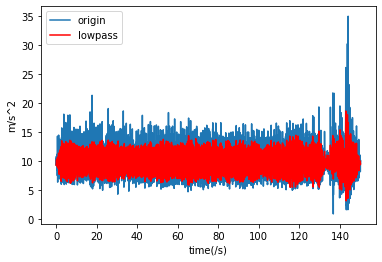

In [12]:

b,a=signal.butter(4,2*3/100)
data=signal.filtfilt(b,a,A_p,axis=0)

plt.plot(Time,A_p[:])
plt.plot(Time,data[:],'r')
plt.legend(('origin','lowpass'))
plt.xlabel('time(/s)')
plt.ylabel('m/s^2')